<a href="https://colab.research.google.com/github/obduliogonzalez/datanalysis_nogl/blob/main/DataAnalysis_Tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. LIBRERIAS

In [9]:
import os
## Gestión de imagenes
import cv2
## Gestión de datos
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 1. Entendiendo el negocio

<a id="3"></a> <br>
# 2. EXPLORACIÓN DE DATOS (EDA)
La exploración de datos es el proceso de investigar, comprender y visualizar un conjunto de datos para obtener información significativa y revelar patrones, tendencias o anomalías que puedan estar presentes en los datos. Es una etapa fundamental en el análisis de datos que precede a la modelización y la toma de decisiones.

Aquí hay una descripción del proceso típico de exploración de datos:

1. Obtención de datos: El primer paso es recopilar los datos de diversas fuentes, como bases de datos, archivos CSV, hojas de cálculo, APIs, etc.
2. Revisión de la estructura de los datos: Se examina la estructura del conjunto de datos para comprender su formato, tamaño, características y tipos de variables (numéricas, categóricas, etc.).
3. Limpieza de datos: Se identifican y se manejan los datos faltantes, valores atípicos (outliers), errores y duplicados. Esto puede implicar imputar valores faltantes, corregir errores, eliminar duplicados y normalizar o escalar los datos según sea necesario.
4. Exploración estadística descriptiva: Se calculan estadísticas descriptivas básicas, como la media, la mediana, la desviación estándar, los valores mínimos y máximos, y los cuartiles, para comprender la distribución y la variabilidad de los datos.
5. Visualización de datos: Se utilizan diversas técnicas de visualización, como histogramas, diagramas de dispersión, diagramas de caja, gráficos de barras, y mapas de calor, para explorar las relaciones entre variables, detectar patrones, identificar tendencias y visualizar la distribución de los datos.
6. Análisis de correlación: Se analiza la correlación entre las variables para comprender cómo se relacionan entre sí. Esto puede implicar el cálculo de matrices de correlación y la visualización de mapas de calor de correlación.
7. Exploración de datos categóricos: Se exploran las variables categóricas utilizando tablas de frecuencia, gráficos de barras y diagramas de pastel para entender la distribución de las categorías y su relación con otras variables.
8. Análisis de datos temporales: Si los datos son temporales, se exploran patrones y tendencias a lo largo del tiempo utilizando gráficos de series temporales y análisis de estacionalidad y tendencias.
9. Identificación de patrones y anomalías: Se buscan patrones interesantes y anomalías en los datos que puedan proporcionar información útil o requerir una investigación adicional.
10. Documentación y presentación de resultados: Se documentan los hallazgos y los insights obtenidos durante la exploración de datos, y se presentan de manera clara y concisa utilizando visualizaciones y narrativas comprensibles.

Source :
https://es.wikipedia.org/wiki/An%C3%A1lisis_exploratorio_de_datos

In [10]:
#df = pd.read_csv("/content/drive/My Drive/Datasets/tips/tips.csv")
#df = pd.read_csv("/drive.google.com/drive/folders/stocks_daily_prices.csv")
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd

# Ruta completa al archivo
file_path = '/content/drive/My Drive/Colab Notebooks/stocks_daily_prices.csv'

# Cargar el archivo CSV
df = pd.read_csv(file_path)

# Mostrar las primeras filas
print(df.head())



       Date      AAPL        JPM         PG        UAL
0  1/2/2008  5.949703  29.448614  47.058838  29.915234
1  1/3/2008  5.952452  29.246094  47.058838  29.690800
2  1/4/2008  5.498071  28.582682  46.870098  31.000002
3  1/7/2008  5.424478  28.868999  47.175980  29.180000
4  1/8/2008  5.229351  27.723747  47.299629  24.389999


## Entendiendo los datos

In [12]:
df.head(10)

,Date,AAPL,JPM,PG,UAL
0,1/2/2008,5.949703,29.448614,47.058838,29.915234
1,1/3/2008,5.952452,29.246094,47.058838,29.690800
2,1/4/2008,5.498071,28.582682,46.870098,31.000002
3,1/7/2008,5.424478,28.868999,47.175980,29.180000
4,1/8/2008,5.229351,27.723747,47.299629,24.389999
5,1/9/2008,5.478222,28.114801,47.208511,26.030001
6,1/10/2008,5.436081,28.862019,47.169464,32.189999
7,1/11/2008,5.273324,28.533800,45.672649,32.070000
8,1/14/2008,5.459290,28.882969,45.744232,32.930000
9,1/15/2008,5.161868,27.353619,45.360241,34.570000


In [13]:
df.tail(10)

,Date,AAPL,JPM,PG,UAL
3632,6/6/2022,146.139999,129.729996,145.320007,44.759998
3633,6/7/2022,148.710007,130.070007,146.940002,46.450001
3634,6/8/2022,147.960007,128.000000,145.110001,44.599998
3635,6/9/2022,142.639999,125.309998,142.490005,42.700001
3636,6/10/2022,137.130005,119.550003,141.949997,41.160000
3637,6/13/2022,131.880005,115.989998,138.149994,37.020000
3638,6/14/2022,132.759995,114.059998,133.839996,36.990002
3639,6/15/2022,135.429993,115.410004,132.509995,37.889999
3640,6/16/2022,130.059998,113.430000,133.320007,34.779999
3641,6/17/2022,131.559998,113.029999,132.360001,36.279999


In [14]:
df.shape

(3642, 5)

In [15]:
df.isnull().sum()

,0
Date,0
AAPL,0
JPM,0
PG,0
UAL,0


In [16]:
df.duplicated().sum()

0

In [17]:
# Verificar que las fechas estén en orden ascendente
df['Date'] = pd.to_datetime(df['Date'])  # Asegurar el formato de fecha
print(df['Date'].is_monotonic_increasing)  # Debe devolver True




True


In [18]:
duplicates = df[df.duplicated(subset=['Date', 'AAPL'], keep=False)]
print(duplicates)


Empty DataFrame
Columns: [Date, AAPL, JPM, PG, UAL]
Index: []


In [19]:
df.dtypes

,0
Date,datetime64[ns]
AAPL,float64
JPM,float64
PG,float64
UAL,float64


In [20]:
print(df.columns)

# Ejemplo: Relación entre AAPL y JPM en porcentaje
df["AAPL_JPM_ratio"] = (df["AAPL"] / df["JPM"]) * 100
print(df.head(10))


Index(['Date', 'AAPL', 'JPM', 'PG', 'UAL'], dtype='object')
        Date      AAPL        JPM         PG        UAL  AAPL_JPM_ratio
0 2008-01-02  5.949703  29.448614  47.058838  29.915234       20.203678
1 2008-01-03  5.952452  29.246094  47.058838  29.690800       20.352982
2 2008-01-04  5.498071  28.582682  46.870098  31.000002       19.235671
3 2008-01-07  5.424478  28.868999  47.175980  29.180000       18.789976
4 2008-01-08  5.229351  27.723747  47.299629  24.389999       18.862353
5 2008-01-09  5.478222  28.114801  47.208511  26.030001       19.485188
6 2008-01-10  5.436081  28.862019  47.169464  32.189999       18.834724
7 2008-01-11  5.273324  28.533800  45.672649  32.070000       18.480975
8 2008-01-14  5.459290  28.882969  45.744232  32.930000       18.901414
9 2008-01-15  5.161868  27.353619  45.360241  34.570000       18.870877


In [21]:
df.describe()

,Date,AAPL,JPM,PG,UAL,AAPL_JPM_ratio
count,3642,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,2015-03-26 07:31:31.927512576,39.648625,64.927239,73.729653,43.183288,49.388103
min,2008-01-02 00:00:00,2.387943,11.545819,29.637867,3.130000,8.547210
25%,2011-08-11 06:00:00,11.441511,31.298827,46.483078,22.320000,33.555169
50%,2015-03-26 12:00:00,23.470343,49.601177,65.661438,43.080002,45.341554
75%,2018-11-04 06:00:00,45.398705,95.376392,82.645994,60.425000,53.994610
max,2022-06-17 00:00:00,181.511704,169.500061,163.410004,96.699997,139.013652
std,NaN,43.326924,39.662998,32.623908,24.392486,26.464614


In [22]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,3642,2015-03-26 07:31:31.927512576,2008-01-02 00:00:00,2011-08-11 06:00:00,2015-03-26 12:00:00,2018-11-04 06:00:00,2022-06-17 00:00:00,NaN
AAPL,3642.0,39.648625,2.387943,11.441511,23.470343,45.398705,181.511704,43.326924
JPM,3642.0,64.927239,11.545819,31.298827,49.601177,95.376392,169.500061,39.662998
PG,3642.0,73.729653,29.637867,46.483078,65.661438,82.645994,163.410004,32.623908
UAL,3642.0,43.183288,3.13,22.32,43.080002,60.425,96.699997,24.392486
AAPL_JPM_ratio,3642.0,49.388103,8.54721,33.555169,45.341554,53.99461,139.013652,26.464614


In [23]:
print(df.dtypes)

df['Date'] = df['Date'].astype('object')

#df.describe(include='object').T

Date              datetime64[ns]
AAPL                     float64
JPM                      float64
PG                       float64
UAL                      float64
AAPL_JPM_ratio           float64
dtype: object


In [24]:
df['AAPL_Category'] = pd.cut(df['AAPL'], bins=3, labels=['Low', 'Medium', 'High'])
print(df['AAPL_Category'].value_counts())


AAPL_Category
Low       2992
High       376
Medium     274
Name: count, dtype: int64


In [25]:
print (df["Date"].unique())
print (df["AAPL"].unique())
print (df["JPM"].unique())
print (df["PG"].unique())
print (df["UAL"].unique())
print (df["AAPL_JPM_ratio"].unique())

[Timestamp('2008-01-02 00:00:00') Timestamp('2008-01-03 00:00:00')
 Timestamp('2008-01-04 00:00:00') ... Timestamp('2022-06-15 00:00:00')
 Timestamp('2022-06-16 00:00:00') Timestamp('2022-06-17 00:00:00')]
[  5.94970322   5.95245218   5.49807072 ... 135.4299927  130.0599976
 131.5599976 ]
[ 29.44861412  29.24609375  28.58268166 ... 115.4100037  113.4300003
 113.0299988 ]
[ 47.05883789  46.87009811  47.17597961 ... 132.5099945  133.3200073
 132.3600006 ]
[29.91523361 29.69079971 31.00000191 ... 37.88999939 34.77999878
 36.27999878]
[ 20.20367815  20.35298195  19.23567138 ... 117.34684027 114.661022
 116.39387684]


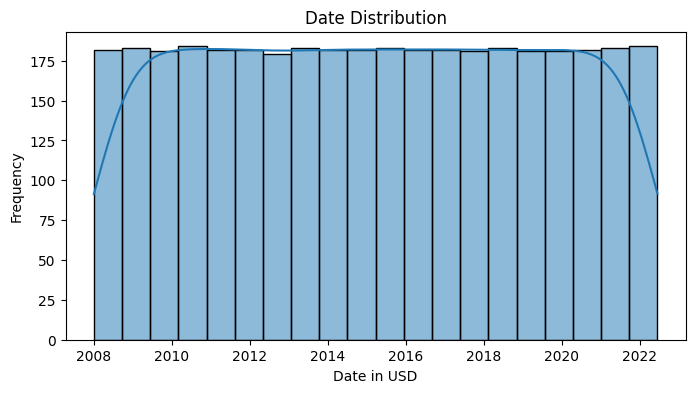

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Date"], kde=True, bins=20)
plt.title("Date Distribution")
plt.xlabel("Date in USD")
plt.ylabel("Frequency")
plt.show()

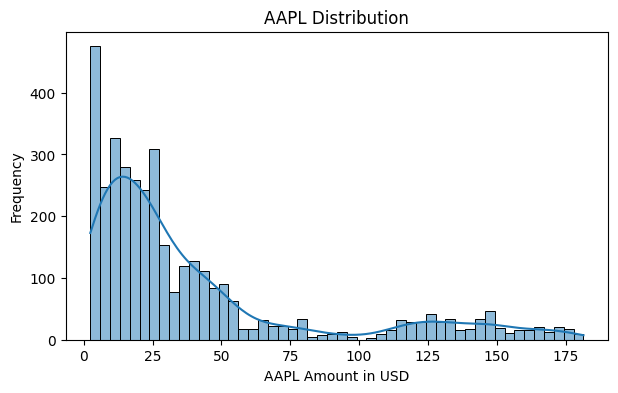

In [27]:
plt.figure(figsize=(7, 4))
sns.histplot(df["AAPL"], kde=True, bins=50)
plt.title("AAPL Distribution")
plt.xlabel("AAPL Amount in USD")
plt.ylabel("Frequency")
plt.show()

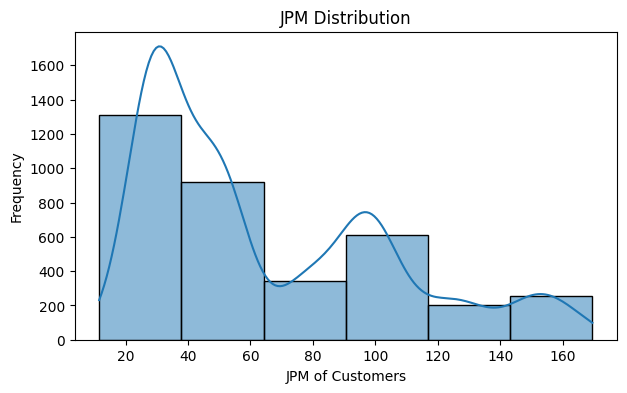

In [28]:
plt.figure(figsize=(7, 4))
sns.histplot(df["JPM"], kde=True, bins=6)
plt.title("JPM Distribution")
plt.xlabel("JPM of Customers")
plt.ylabel("Frequency")
plt.show()

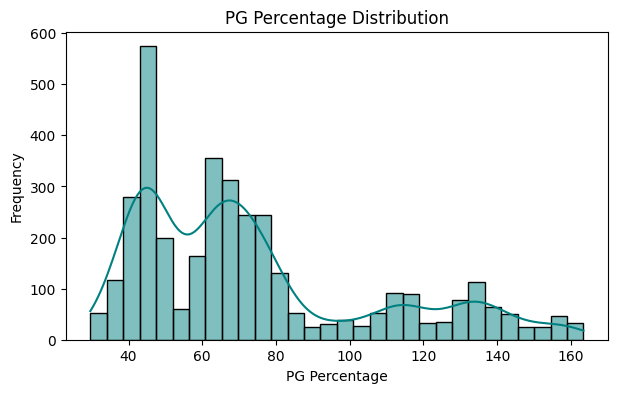

In [29]:
plt.figure(figsize=(7, 4))
sns.histplot(df["PG"], kde=True, bins=30, color='teal')
plt.title("PG Percentage Distribution")
plt.xlabel("PG Percentage")
plt.ylabel("Frequency")
plt.show()

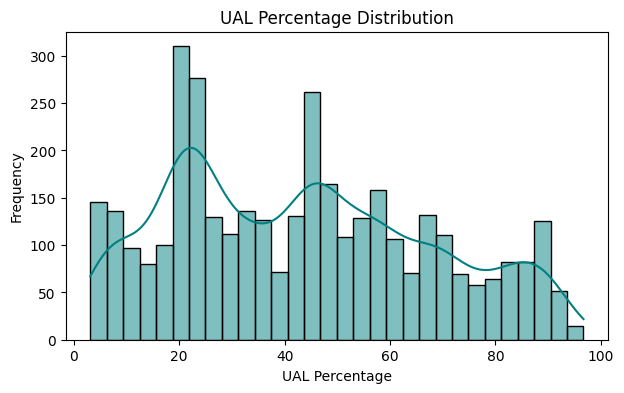

In [30]:
plt.figure(figsize=(7, 4))
sns.histplot(df["UAL"], kde=True, bins=30, color='teal')
plt.title("UAL Percentage Distribution")
plt.xlabel("UAL Percentage")
plt.ylabel("Frequency")
plt.show()

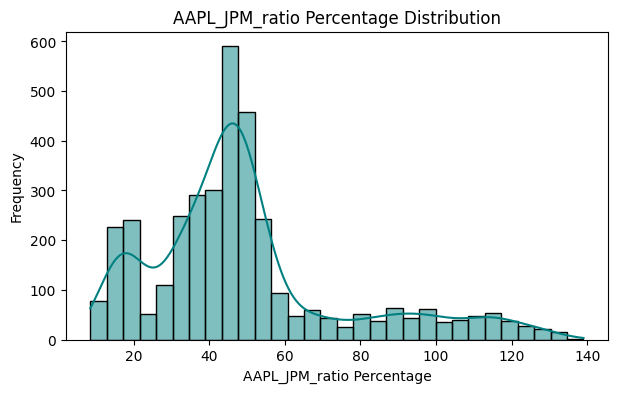

In [31]:
plt.figure(figsize=(7, 4))
sns.histplot(df["AAPL_JPM_ratio"], kde=True, bins=30, color='teal')
plt.title("AAPL_JPM_ratio Percentage Distribution")
plt.xlabel("AAPL_JPM_ratio Percentage")
plt.ylabel("Frequency")
plt.show()

<ipython-input-32-501ae92a87ed>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Date', data=df, palette='viridis')


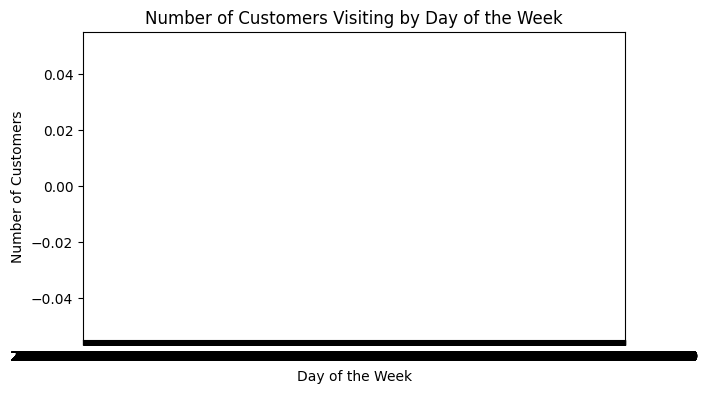

In [32]:
plt.figure(figsize=(7, 4))
sns.countplot(x='Date', data=df, palette='viridis')
plt.title("Number of Customers Visiting by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Customers")
plt.show()

<ipython-input-33-930e41ffa55c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weekday', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


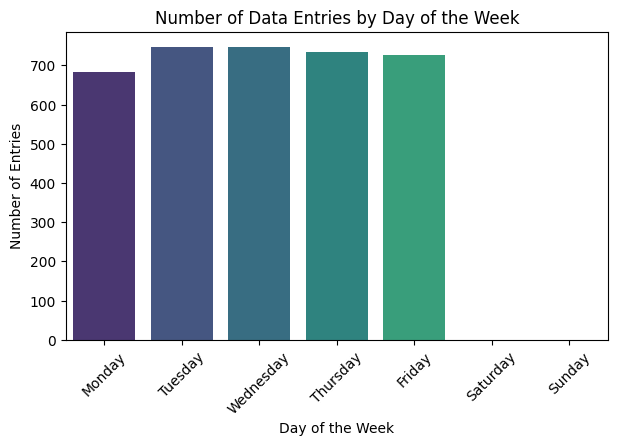

In [33]:
# Crear una nueva columna para el día de la semana
df['Weekday'] = pd.to_datetime(df['Date']).dt.day_name()

# Graficar la cantidad de datos agrupados por el día de la semana
plt.figure(figsize=(7, 4))
sns.countplot(x='Weekday', data=df, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Number of Data Entries by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Entries")
plt.xticks(rotation=45)
plt.show()


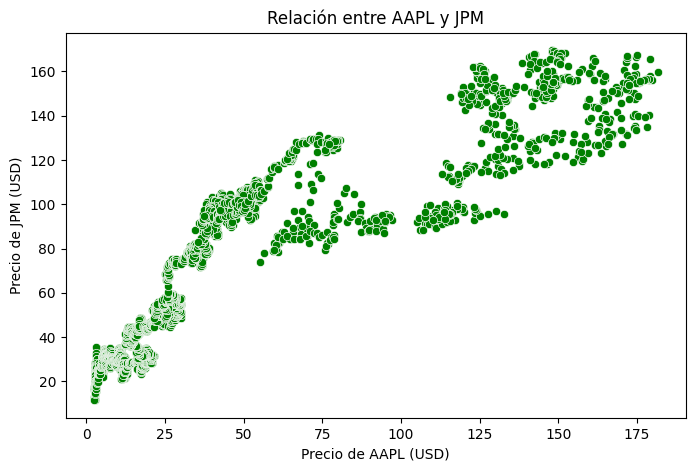

In [34]:
# Importar las bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfica de dispersión entre AAPL y JPM
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['AAPL'], y=df['JPM'], color='green')
plt.title('Relación entre AAPL y JPM')
plt.xlabel('Precio de AAPL (USD)')
plt.ylabel('Precio de JPM (USD)')
plt.show()


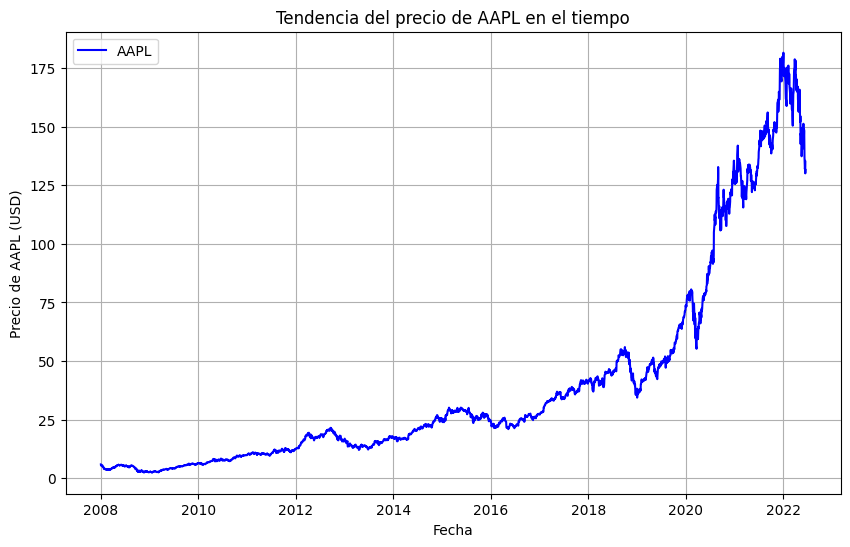

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AAPL'], label='AAPL', color='blue')
plt.title('Tendencia del precio de AAPL en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio de AAPL (USD)')
plt.legend()
plt.grid(True)
plt.show()


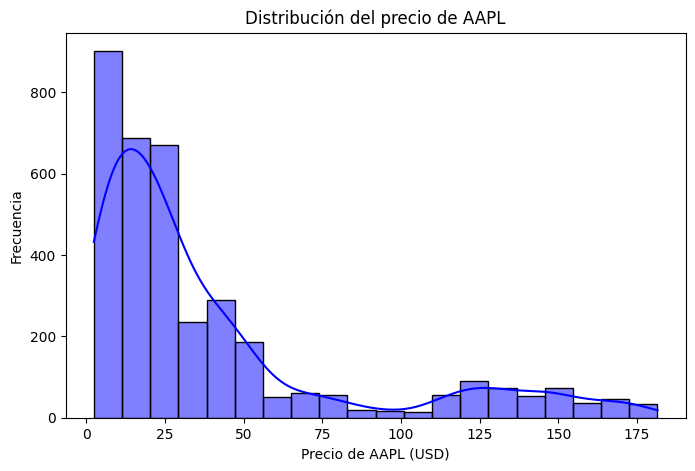

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['AAPL'], kde=True, bins=20, color='blue')
plt.title('Distribución del precio de AAPL')
plt.xlabel('Precio de AAPL (USD)')
plt.ylabel('Frecuencia')
plt.show()


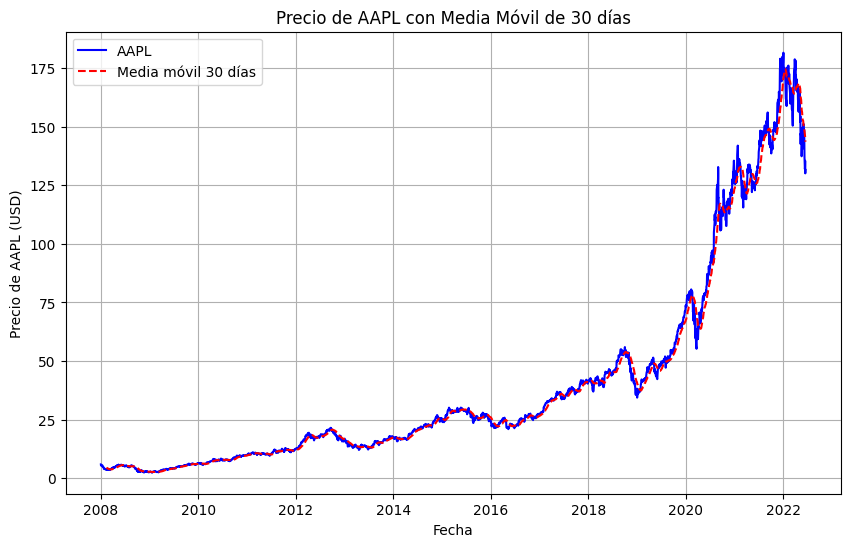

In [38]:
df['AAPL_30D_MA'] = df['AAPL'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AAPL'], label='AAPL', color='blue')
plt.plot(df['Date'], df['AAPL_30D_MA'], label='Media móvil 30 días', color='red', linestyle='--')
plt.title('Precio de AAPL con Media Móvil de 30 días')
plt.xlabel('Fecha')
plt.ylabel('Precio de AAPL (USD)')
plt.legend()
plt.grid(True)
plt.show()


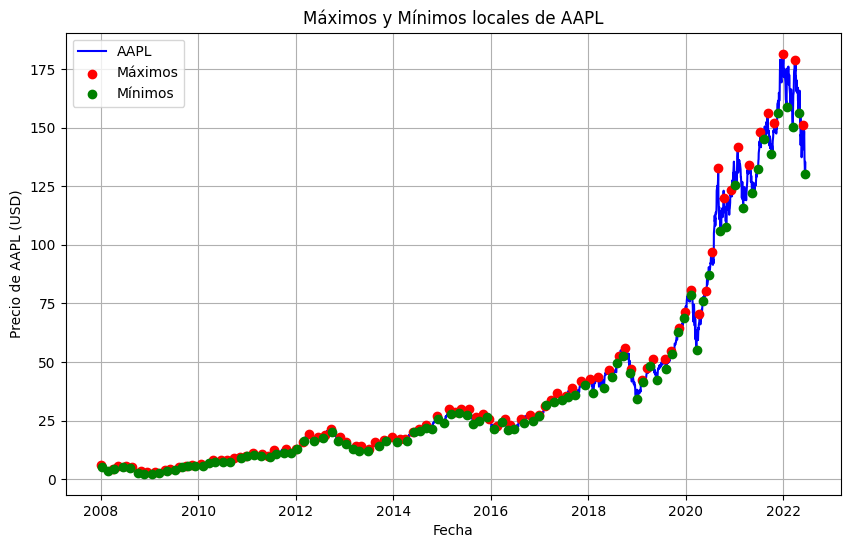

In [39]:
from scipy.signal import find_peaks

# Encontrar máximos locales
peaks, _ = find_peaks(df['AAPL'], distance=30)
# Encontrar mínimos locales (invertir la señal)
valleys, _ = find_peaks(-df['AAPL'], distance=30)

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AAPL'], label='AAPL', color='blue')
plt.scatter(df['Date'].iloc[peaks], df['AAPL'].iloc[peaks], color='red', label='Máximos', zorder=5)
plt.scatter(df['Date'].iloc[valleys], df['AAPL'].iloc[valleys], color='green', label='Mínimos', zorder=5)
plt.title('Máximos y Mínimos locales de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de AAPL (USD)')
plt.legend()
plt.grid(True)
plt.show()


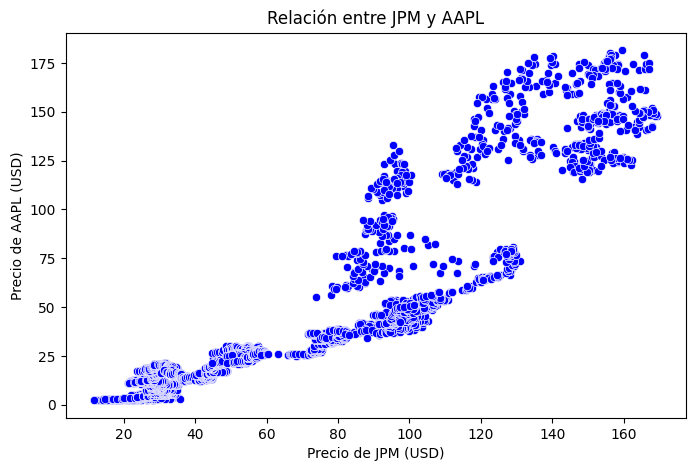

In [40]:


# Gráfica de dispersión entre JPM y AAPL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['JPM'], y=df['AAPL'], color='blue')
plt.title('Relación entre JPM y AAPL')
plt.xlabel('Precio de JPM (USD)')
plt.ylabel('Precio de AAPL (USD)')
plt.show()


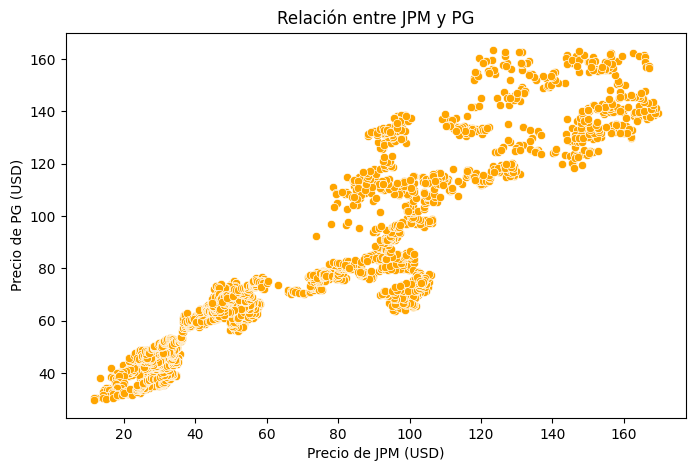

In [41]:
# Gráfica de dispersión entre JPM y PG
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['JPM'], y=df['PG'], color='orange')
plt.title('Relación entre JPM y PG')
plt.xlabel('Precio de JPM (USD)')
plt.ylabel('Precio de PG (USD)')
plt.show()


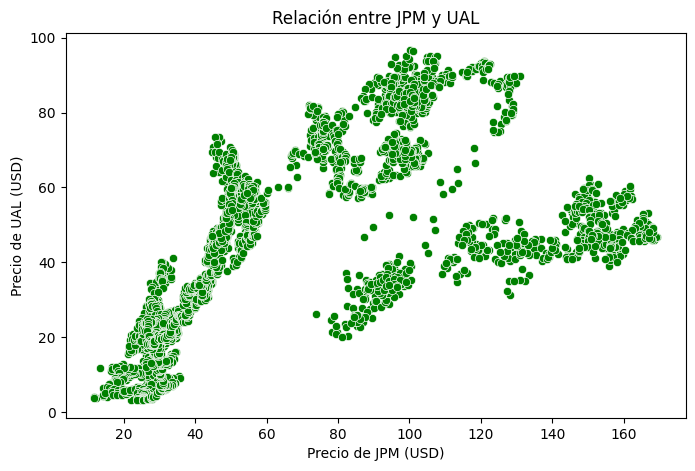

In [42]:
# Gráfica de dispersión entre JPM y UAL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['JPM'], y=df['UAL'], color='green')
plt.title('Relación entre JPM y UAL')
plt.xlabel('Precio de JPM (USD)')
plt.ylabel('Precio de UAL (USD)')
plt.show()


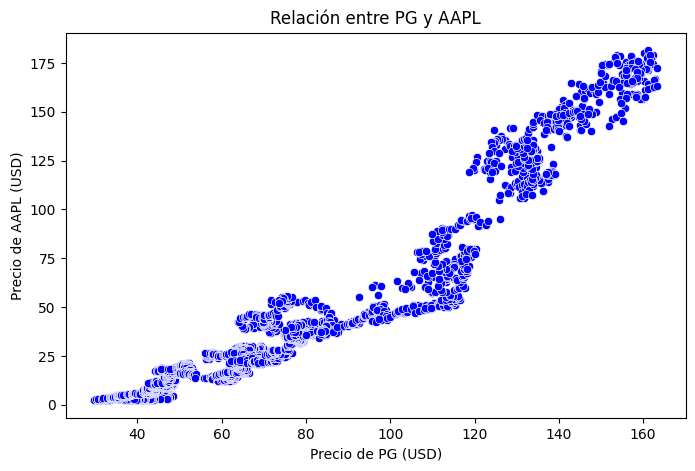

In [43]:
# Gráfica de dispersión entre PG y AAPL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['PG'], y=df['AAPL'], color='blue')
plt.title('Relación entre PG y AAPL')
plt.xlabel('Precio de PG (USD)')
plt.ylabel('Precio de AAPL (USD)')
plt.show()


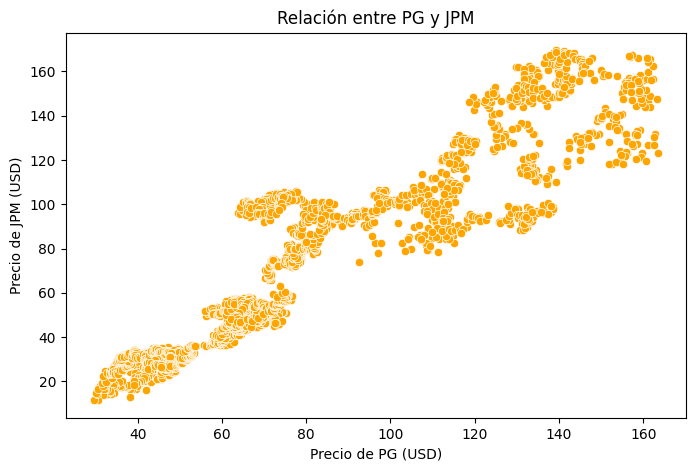

In [44]:
# Gráfica de dispersión entre PG y JPM
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['PG'], y=df['JPM'], color='orange')
plt.title('Relación entre PG y JPM')
plt.xlabel('Precio de PG (USD)')
plt.ylabel('Precio de JPM (USD)')
plt.show()


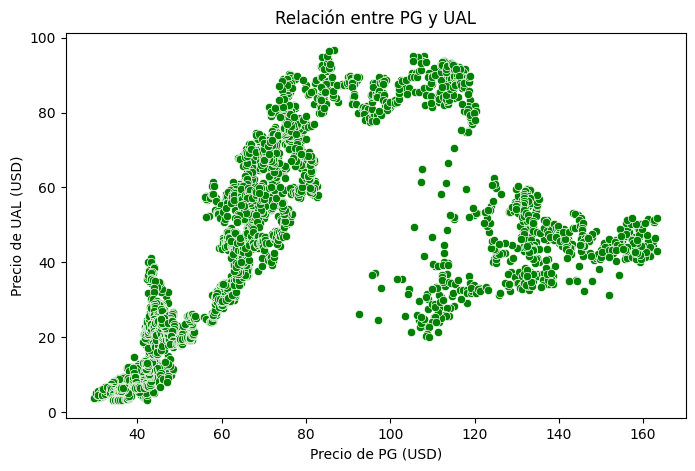

In [45]:
# Gráfica de dispersión entre PG y UAL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['PG'], y=df['UAL'], color='green')
plt.title('Relación entre PG y UAL')
plt.xlabel('Precio de PG (USD)')
plt.ylabel('Precio de UAL (USD)')
plt.show()


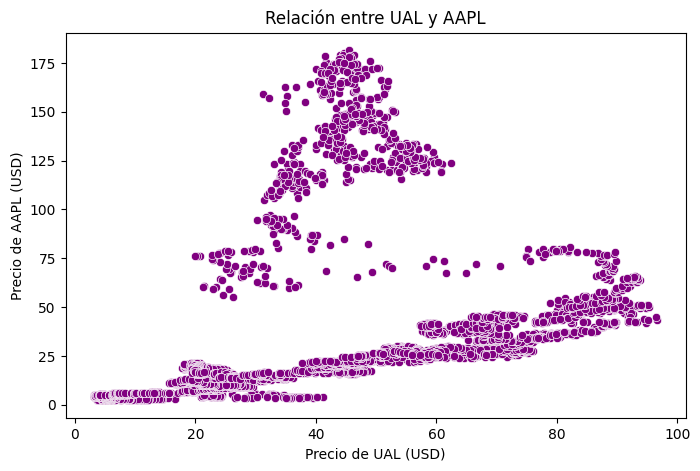

In [46]:
# Gráfica de dispersión entre UAL y AAPL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['UAL'], y=df['AAPL'], color='purple')
plt.title('Relación entre UAL y AAPL')
plt.xlabel('Precio de UAL (USD)')
plt.ylabel('Precio de AAPL (USD)')
plt.show()


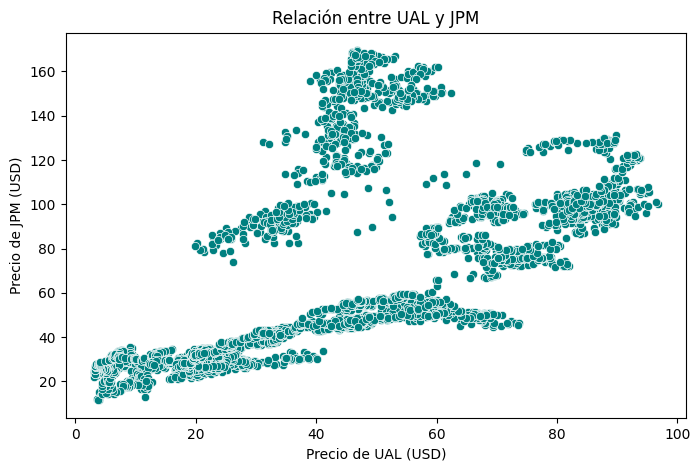

In [47]:
# Gráfica de dispersión entre UAL y JPM
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['UAL'], y=df['JPM'], color='teal')
plt.title('Relación entre UAL y JPM')
plt.xlabel('Precio de UAL (USD)')
plt.ylabel('Precio de JPM (USD)')
plt.show()


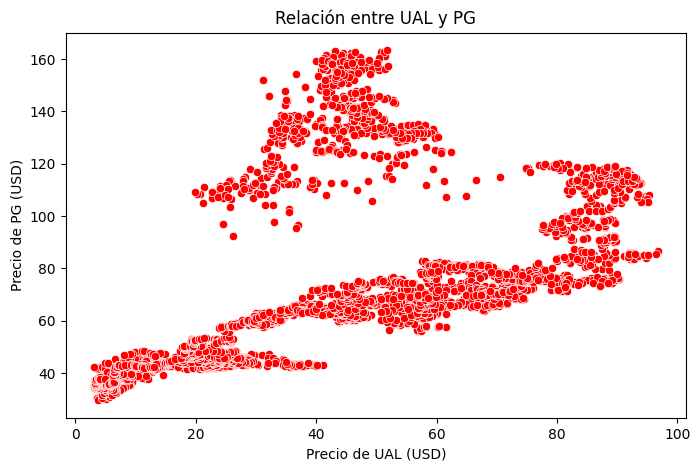

In [48]:
# Gráfica de dispersión entre UAL y PG
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['UAL'], y=df['PG'], color='red')
plt.title('Relación entre UAL y PG')
plt.xlabel('Precio de UAL (USD)')
plt.ylabel('Precio de PG (USD)')
plt.show()


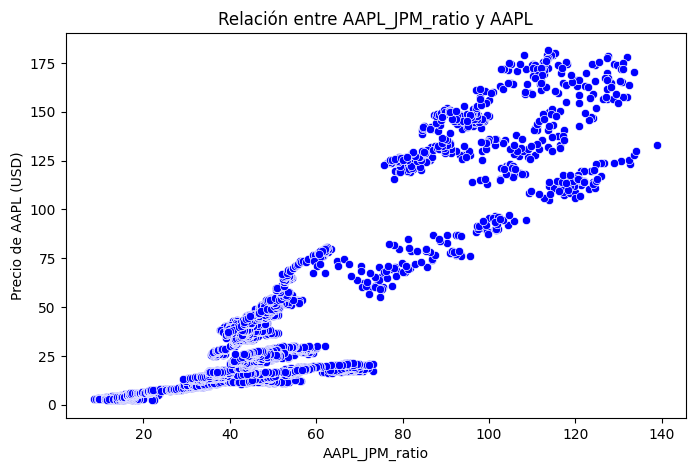

In [49]:
# Gráfica de dispersión entre AAPL_JPM_ratio y AAPL
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['AAPL_JPM_ratio'], y=df['AAPL'], color='blue')
plt.title('Relación entre AAPL_JPM_ratio y AAPL')
plt.xlabel('AAPL_JPM_ratio')
plt.ylabel('Precio de AAPL (USD)')
plt.show()


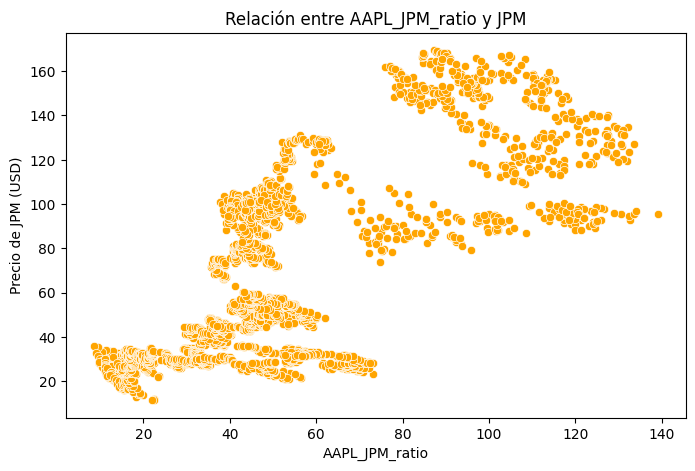

In [50]:
# Gráfica de dispersión entre AAPL_JPM_ratio y JPM
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['AAPL_JPM_ratio'], y=df['JPM'], color='orange')
plt.title('Relación entre AAPL_JPM_ratio y JPM')
plt.xlabel('AAPL_JPM_ratio')
plt.ylabel('Precio de JPM (USD)')
plt.show()


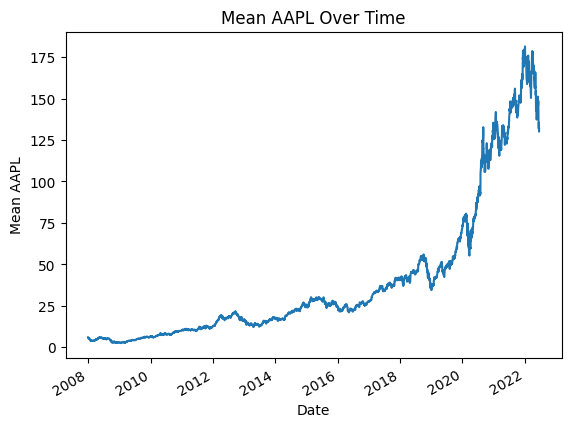

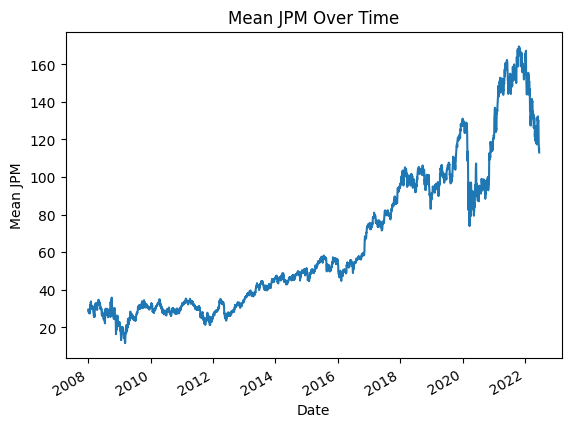

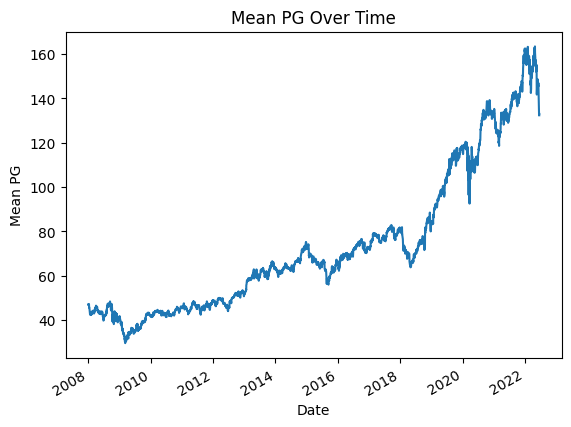

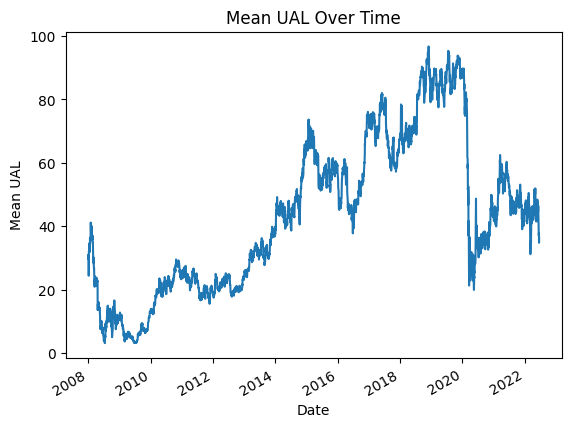

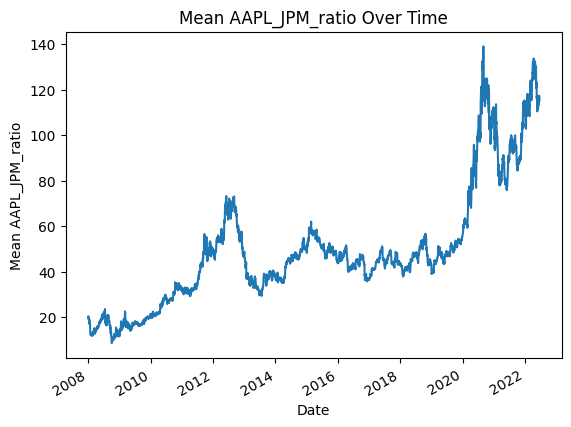

In [54]:
# Lista de columnas a trabajar
columns_to_plot = ['AAPL', 'JPM', 'PG', 'UAL', 'AAPL_JPM_ratio']

# Crear gráficos de las medias de las columnas seleccionadas
for col in columns_to_plot:
    df.groupby('Date')[col].mean().plot(kind='line', title=f'Mean {col} Over Time', ylabel=f'Mean {col}')
    plt.xlabel('Date')
    plt.show()


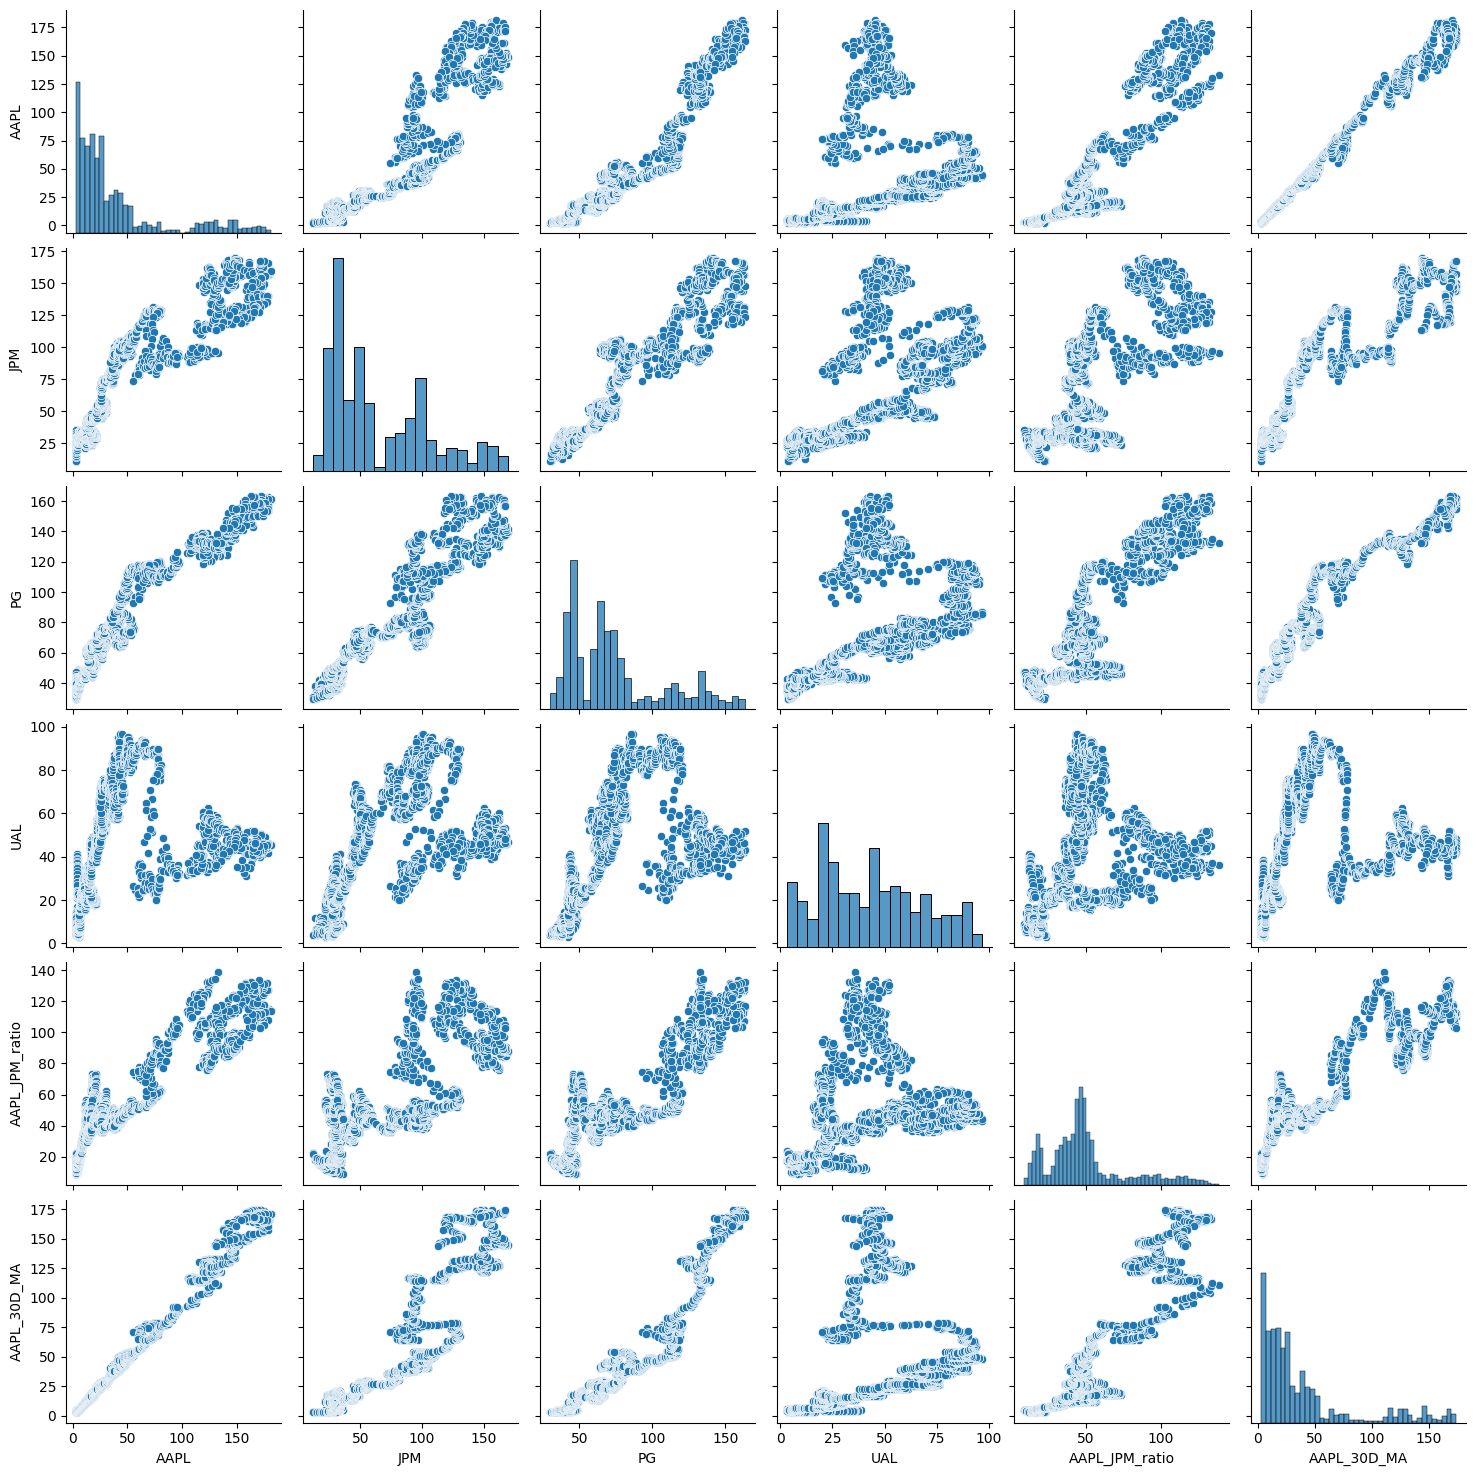

In [55]:
sns.pairplot(df)
plt.show()

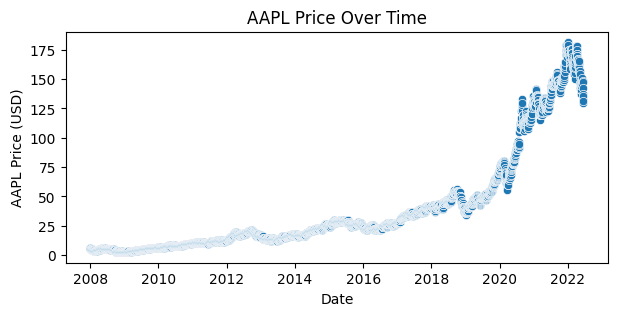

In [56]:
plt.figure(figsize=(7, 3))
sns.scatterplot(x="Date", y="AAPL", data=df)
plt.title("AAPL Price Over Time")
plt.xlabel("Date")
plt.ylabel("AAPL Price (USD)")
plt.show()


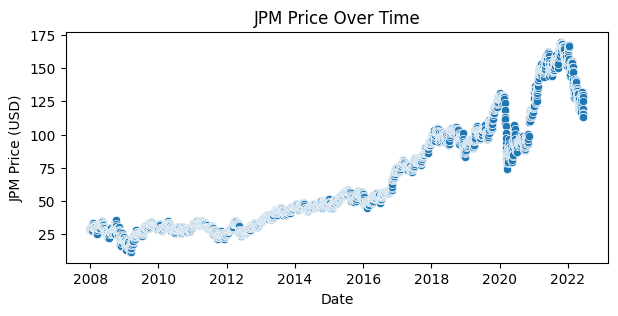

In [57]:
plt.figure(figsize=(7, 3))
sns.scatterplot(x="Date", y="JPM", data=df)
plt.title("JPM Price Over Time")
plt.xlabel("Date")
plt.ylabel("JPM Price (USD)")
plt.show()


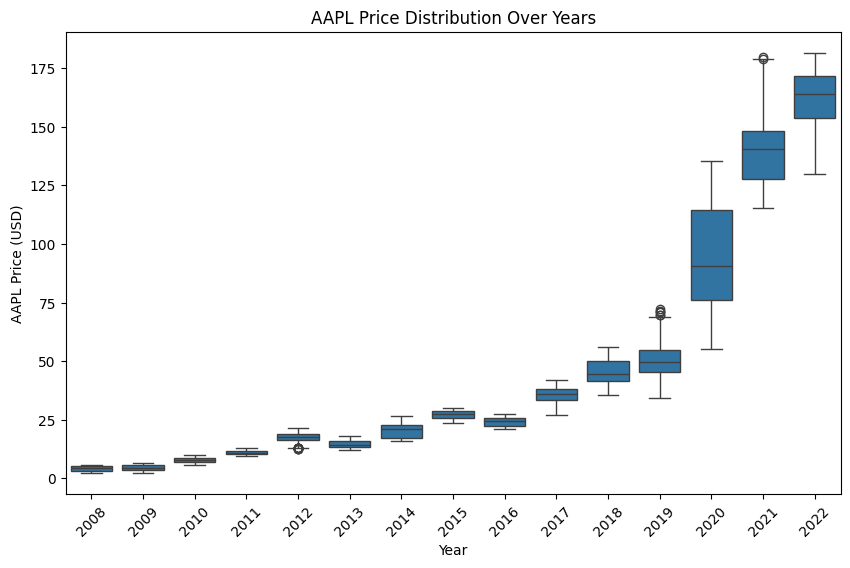

In [64]:
# Convertir la columna 'Date' al formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Crear una nueva columna de año a partir de la fecha
df['Year'] = df['Date'].dt.year

# Generar el boxplot agrupado por año
plt.figure(figsize=(10, 6))
sns.boxplot(x="Year", y="AAPL", data=df)
plt.title("AAPL Price Distribution Over Years")
plt.xlabel("Year")
plt.ylabel("AAPL Price (USD)")
plt.xticks(rotation=45)  # Rotar etiquetas si es necesario
plt.show()


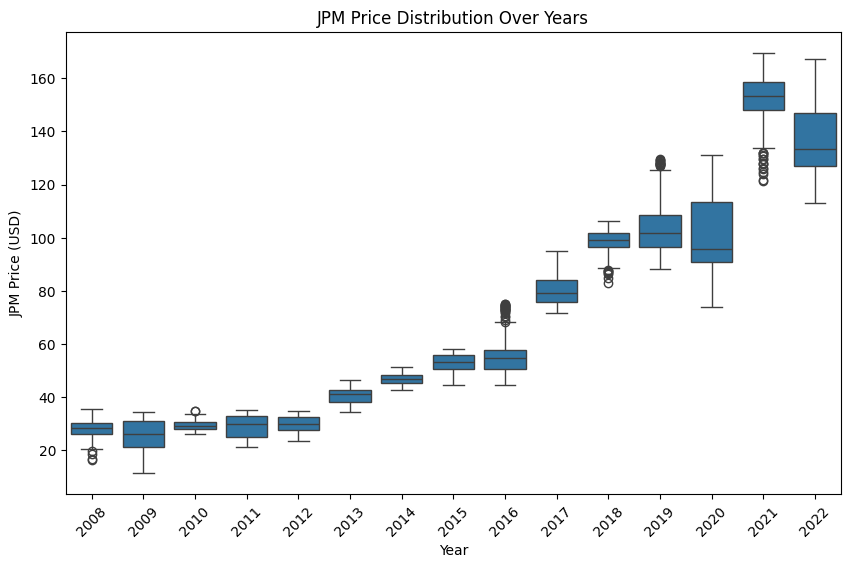

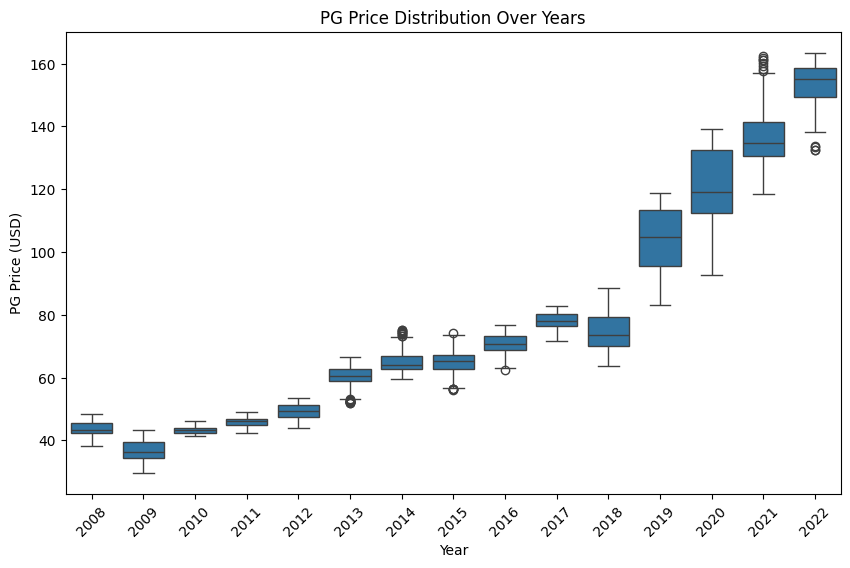

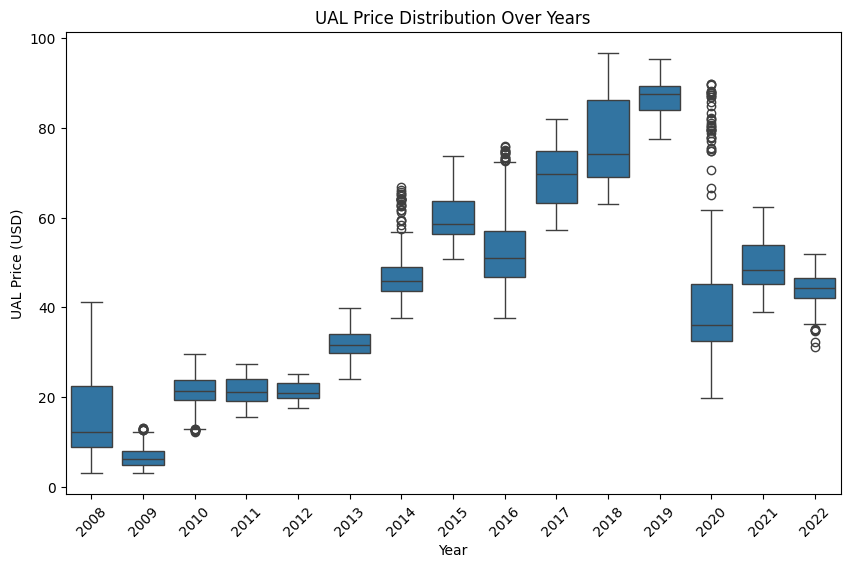

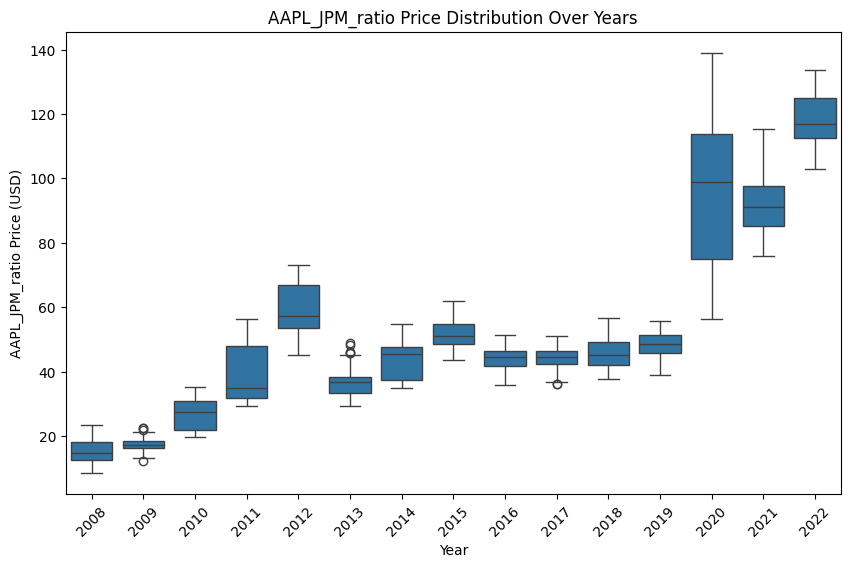

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas para generar gráficas
columns = ['JPM', 'PG', 'UAL', 'AAPL_JPM_ratio']

# Generar gráficos para cada columna agrupados por el año
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Year', y=column, data=df)
    plt.title(f"{column} Price Distribution Over Years")
    plt.xlabel("Year")
    plt.ylabel(f"{column} Price (USD)")
    plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
    plt.show()



In [68]:
df['Date_numeric'] = df['Date'].map(pd.Timestamp.toordinal)


<Figure size 1000x600 with 0 Axes>

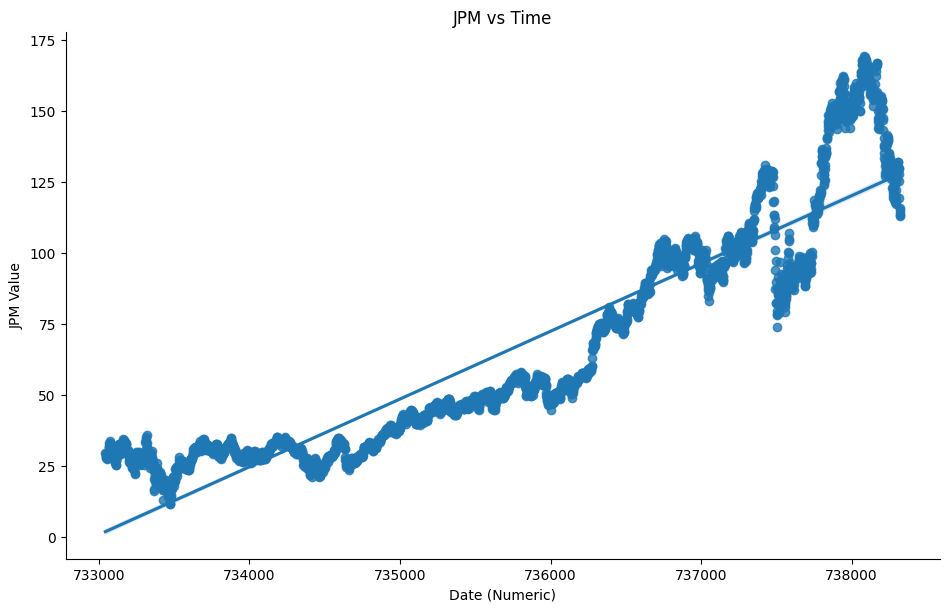

<Figure size 1000x600 with 0 Axes>

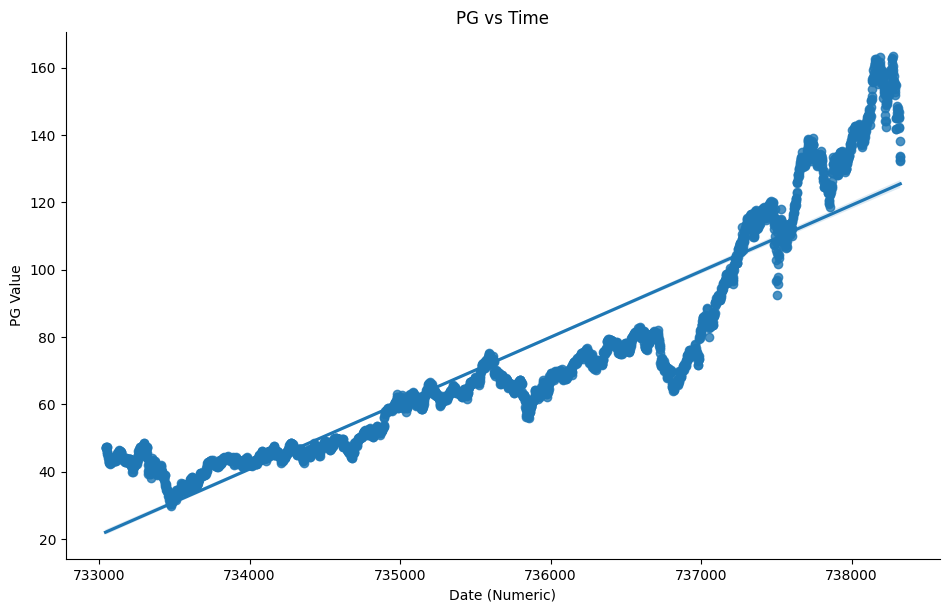

<Figure size 1000x600 with 0 Axes>

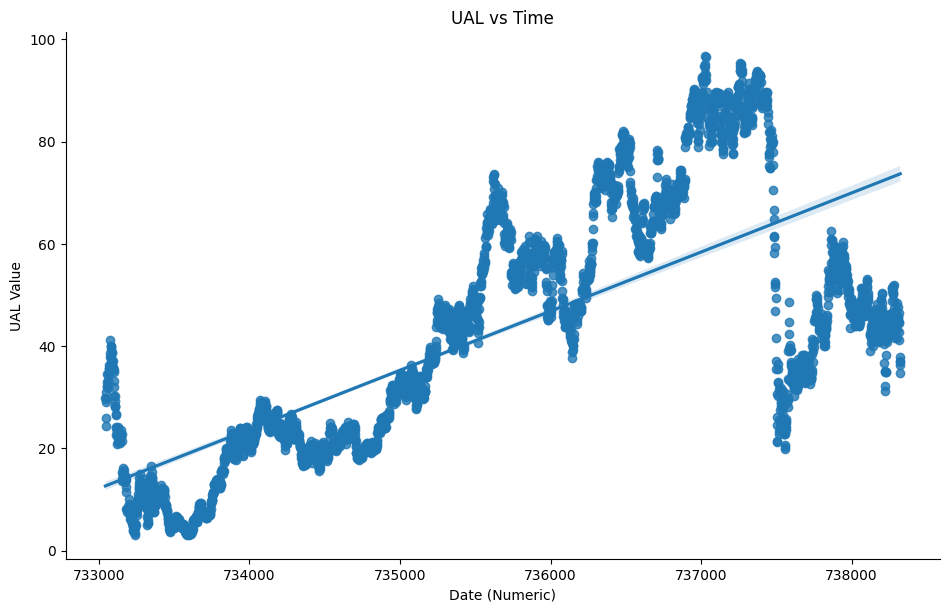

<Figure size 1000x600 with 0 Axes>

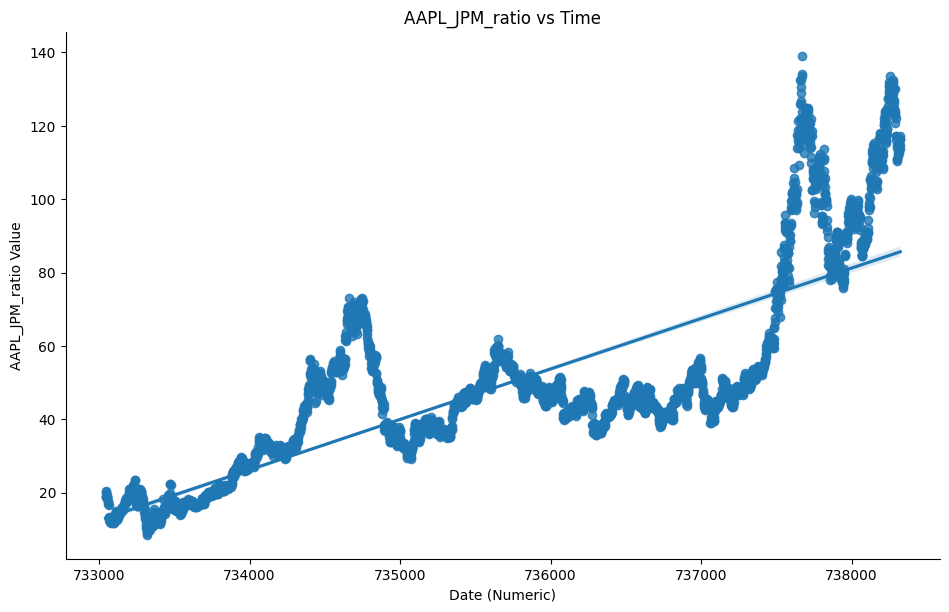

In [69]:
# Lista de columnas para graficar
columns = ['JPM', 'PG', 'UAL', 'AAPL_JPM_ratio']

# Iterar sobre cada columna para crear una gráfica
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.lmplot(x="Date_numeric", y=column, data=df, aspect=1.6, palette="viridis", height=6)
    plt.title(f"{column} vs Time")
    plt.xlabel("Date (Numeric)")
    plt.ylabel(f"{column} Value")
    plt.show()
